# Init

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tabulate as tb

Data = np.array \
([
    61.2, 61.4, 60.2, 61.2, 61.3, 60.4, 61.4, 60.8, 61.2, 60.6,
    61.6, 60.2, 61.3, 60.3, 60.7, 60.9, 61.2, 60.5, 61.0, 61.4,
    61.1, 60.9, 61.5, 61.4, 60.6, 61.2, 60.1, 61.3, 61.1, 61.3,
    60.3, 61.3, 60.6, 61.7, 60.6, 61.2, 60.8, 61.3, 61.0, 61.2,
    60.5, 61.4, 60.7, 61.3, 60.9, 61.2, 61.1, 61.3, 60.9, 61.4,
    60.7, 61.2, 60.3, 61.1, 61.0, 61.5, 61.3, 61.9, 61.4, 61.3,
    61.6, 61.0, 61.7, 61.1, 60.9, 61.5, 61.6, 61.4, 61.5, 61.2,
    61.6, 61.3, 61.8, 61.1, 61.7, 60.9, 62.2, 61.1, 62.1, 61.0,
    61.5, 61.7, 62.3, 62.3, 61.7, 62.9, 62.5, 62.8, 62.6, 61.5,
    62.1, 62.6, 61.6, 62.5, 62.4, 62.3, 62.1, 62.3, 62.2, 62.1
], type(float))

lenData = len(Data)
# print(tb.tabulate(np.array_split(Data, 10)))


# Frequencies

## Discrete series

In [2]:
sortedData = np.sort(Data)
orderedData, frequency = np.unique(sortedData, return_counts=True)
lenOrderedData = len(orderedData)
barColumnSize = (orderedData[0] - orderedData[-1]) / lenOrderedData

---------  ----  ----  ----  ----  ----  ----  ----  ----  ----  --  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
Xi         60.1  60.2  60.3  60.4  60.5  60.6  60.7  60.8  60.9  61  61.1  61.2  61.3  61.4  61.5  61.6  61.7  61.8  61.9  62.1  62.2  62.3  62.4  62.5  62.6  62.8  62.9
Frequency   1     2     3     1     2     4     3     2     6     5   7    10    11     8     6     5     5     1     1     4     2     4     1     2     2     1     1
---------  ----  ----  ----  ----  ----  ----  ----  ----  ----  --  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----


Text(0, 0.5, 'Frequency')

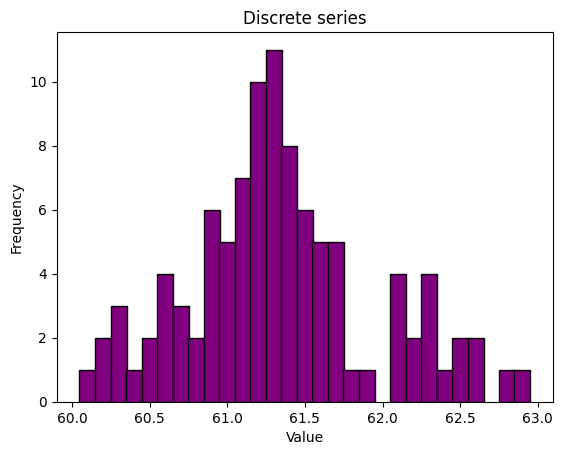

In [3]:
print(tb.tabulate([orderedData, frequency], showindex=['Xi', 'Frequency']))

bar = plt.bar(orderedData, frequency,
              color='purple', edgecolor='k',
              width=barColumnSize)
plt.title('Discrete series')
plt.xlabel('Value')
plt.ylabel('Frequency')

## Intervals series

In [4]:
R = sortedData[-1] - sortedData[0]
k = np.sqrt(lenData)
h = np.round(R / k, 1)
offset = 0.5 * h
x0 = sortedData[0] - offset
lenSeries = int(np.round(k, 1))
sessions = np.array([(.0, .0)] * lenSeries)
sessionElementsCount = np.array([1] * lenSeries)

for i in range(lenSeries):
    sessionEnd = x0 + h
    sessions[i] = (x0, sessionEnd)
    sessionElementsCount[i] = \
        np.sum(((sortedData >= x0) & (sortedData < sessionEnd)))
    x0 += h

-------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------
59.95 - 60.25  60.25 - 60.55  60.55 - 60.85  60.85 - 61.15  61.15 - 61.45  61.45 - 61.75  61.75 - 62.05  62.05 - 62.35  62.35 - 62.65  62.65 - 62.95
3              6              9              18             29             16             2              10             5              2
-------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------  -------------


Text(0, 0.5, 'Frequency')

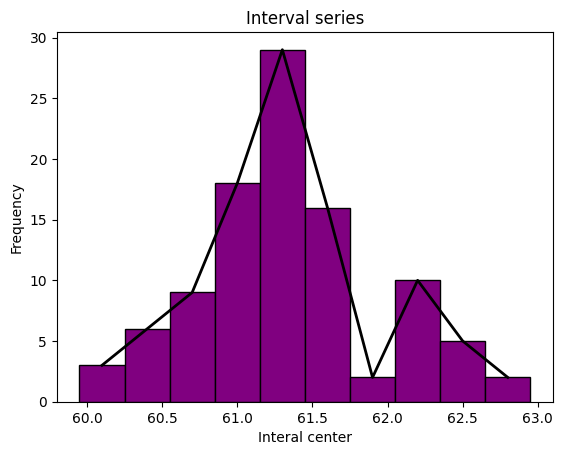

In [5]:
print(
    tb.tabulate(
        [[f'{session[0]:.2f} - {session[1]:.2f}' for session in sessions],
         sessionElementsCount]))

positions = [session[0] + offset for session in sessions]
plt.bar(positions, sessionElementsCount,
        color='purple', edgecolor='k',
        width=h)
plt.plot(positions, sessionElementsCount,
         color="k", linewidth=2)
plt.title('Interval series')
plt.xlabel('Interals')
plt.ylabel('Frequency')


## Sum curve

In [6]:
relatedFrequencies = np.array([np.round(fr / lenData, 2) for fr in frequency])
accumulatedRelativeFrequencies = [.0] * lenOrderedData
accumulatedRelativeFrequencies[0] = relatedFrequencies[0] 
for i in range(1, lenOrderedData):
    accumulatedRelativeFrequencies[i] = \
        accumulatedRelativeFrequencies[i - 1] + relatedFrequencies[i]

-----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
60.1   60.2   60.3   60.4   60.5   60.6   60.7   60.8   60.9   61     61.1   61.2   61.3   61.4   61.5   61.6   61.7   61.8   61.9   62.1   62.2   62.3   62.4   62.5   62.6   62.8   62.9
 0.01   0.02   0.03   0.01   0.02   0.04   0.03   0.02   0.06   0.05   0.07   0.1    0.11   0.08   0.06   0.05   0.05   0.01   0.01   0.04   0.02   0.04   0.01   0.02   0.02   0.01   0.01
 0.01   0.03   0.06   0.07   0.09   0.13   0.16   0.18   0.24   0.29   0.36   0.46   0.57   0.65   0.71   0.76   0.81   0.82   0.83   0.87   0.89   0.93   0.94   0.96   0.98   0.99   1
-----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----


Text(0, 0.5, 'Frequency')

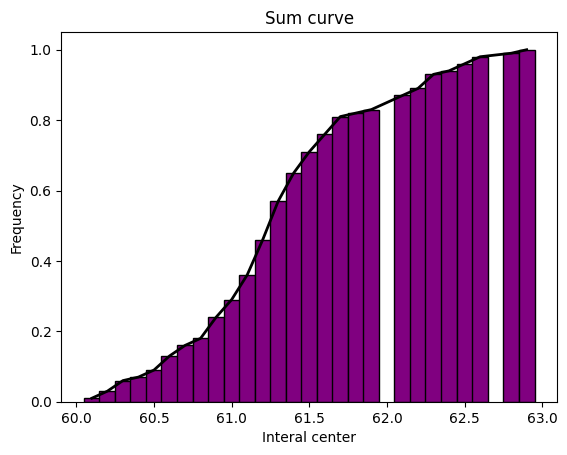

In [12]:
print(tb.tabulate(
    [orderedData,
     relatedFrequencies,
     accumulatedRelativeFrequencies]))

plt.bar(orderedData, accumulatedRelativeFrequencies,
        width=(orderedData[-1] - orderedData[0]) / lenOrderedData, color='purple', edgecolor='k')
plt.plot(orderedData, accumulatedRelativeFrequencies,
        linewidth=2, color='k')
plt.title('Sum curve')
plt.xlabel('Interal center')
plt.ylabel('Frequency')